# In Depth Analysis of The Coca-Cola Company (KO)

> Running Baseline Models for EDA and Modeling of stock time series forecasting

> Historical stock data obtained from Yahoo Finance

> Using ARIMA, Auto Arima and Facebook Prophet models

In [1]:
from Functions import *

In [2]:
df = pd.read_csv('KO.csv')

In [3]:
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,42.259998,42.400002,41.799999,42.139999,33.559841,9921100
1,2015-01-05,42.689999,42.970001,42.080002,42.139999,33.559841,26292600
2,2015-01-06,42.410000,42.939999,42.240002,42.459999,33.814693,16897500
3,2015-01-07,42.799999,43.110001,42.580002,42.990002,34.236782,13412300
4,2015-01-08,43.180000,43.570000,43.099998,43.509998,34.650894,21743600
5,2015-01-09,43.470001,43.560001,42.950001,43.029999,34.268631,12733500
6,2015-01-12,43.070000,43.200001,42.459999,42.639999,33.958042,11415800
7,2015-01-13,42.830002,43.240002,42.450001,42.630001,33.950077,12529500
8,2015-01-14,42.080002,42.599998,42.070000,42.560001,33.894337,13447600
9,2015-01-15,42.830002,42.860001,42.169998,42.380001,33.750977,11193100


# Preprocessing Function

> From the default stock data provided, we want to look at the change in Adj Close price over time (days)

> The Volume will be our exogenous variable

In [4]:
X, Xvol = preprocess(init_data = df, exog = True)

In [5]:
df = pd.read_csv('KO.csv')

In [6]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,42.259998,42.400002,41.799999,42.139999,33.559841,9921100
1,2015-01-05,42.689999,42.970001,42.080002,42.139999,33.559841,26292600
2,2015-01-06,42.410000,42.939999,42.240002,42.459999,33.814693,16897500
3,2015-01-07,42.799999,43.110001,42.580002,42.990002,34.236782,13412300
4,2015-01-08,43.180000,43.570000,43.099998,43.509998,34.650894,21743600


In [7]:
X.head()

Date
2015-01-02    33.559841
2015-01-05    33.559841
2015-01-06    33.814693
2015-01-07    34.236782
2015-01-08    34.650894
Name: Adj Close, dtype: float64

In [8]:
Xvol.head()

Date
2015-01-02     9921100
2015-01-05    26292600
2015-01-06    16897500
2015-01-07    13412300
2015-01-08    21743600
Name: Volume, dtype: int64

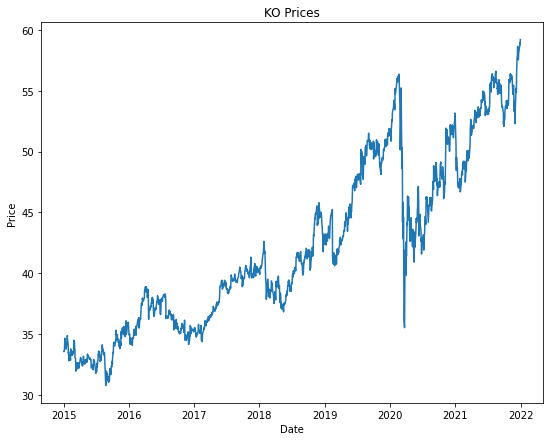

In [9]:
figure = plt.figure(figsize=(9,7))
plt.plot(X)
plt.title('KO Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show();

# Log Transformations and FB Prophet Prep

> Preprocessing can perform log transformations on the data

> Can also shape the data in the format used by Prophet

In [10]:
Xlog, Xvollog = preprocess(init_data = df, exog = True, logged = True)
Xfb = preprocess(init_data = df, facebook = True)

In [11]:
Xlog.head()

Date
2015-01-02    3.513330
2015-01-05    3.513330
2015-01-06    3.520895
2015-01-07    3.533301
2015-01-08    3.545324
Name: Adj Close, dtype: float64

In [12]:
Xfb.head()

,ds,y
0,2015-01-02,33.559841
1,2015-01-05,33.559841
2,2015-01-06,33.814693
3,2015-01-07,34.236782
4,2015-01-08,34.650894


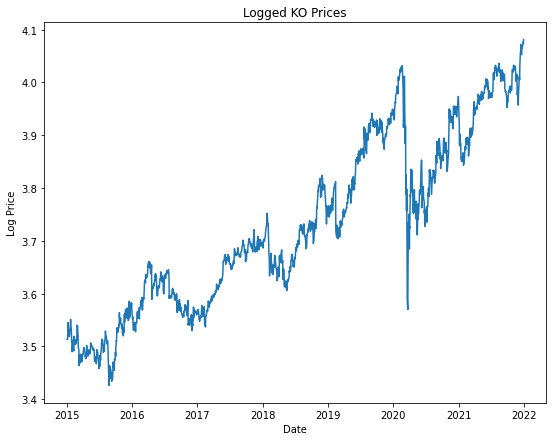

In [13]:
figure2 = plt.figure(figsize=(9,7))
plt.plot(Xlog)
plt.title('Logged KO Prices')
plt.xlabel('Date')
plt.ylabel('Log Price')
plt.show();

# Train Test Split for Time Series

> Instead of taking random samples of the data, train test split sets a cutoff date for training and testing data

> The same preprocessing above is built in to the split, along with log transform and prophet set up

> The split is 85% Train, 15% Test

In [14]:
Xtrain,Xtrainvol,Xtest,Xtestvol = train_test(df, exog = True)

In [15]:
Xtrain.head()

Date
2015-01-02    33.559841
2015-01-05    33.559841
2015-01-06    33.814693
2015-01-07    34.236782
2015-01-08    34.650894
Name: Adj Close, dtype: float64

In [16]:
Xtest.head()

Date
2020-08-10    45.533054
2020-08-11    45.733437
2020-08-12    46.210518
2020-08-13    46.162811
2020-08-14    46.229603
Name: Adj Close, dtype: float64

In [17]:
length_data = len(df)
length_train = len(Xtrain)
length_test = len(Xtest)
print('Total Data Length:',length_data)
print('Train Length:', length_train, length_train/length_data*100,"%")
print('Test Length:', length_test, length_test/length_data*100,"%")

Total Data Length: 1763
Train Length: 1410 79.97731140102098 %
Test Length: 353 20.022688598979013 %


# ARIMA Order Parameters 

> These functions provide intial p,d,q values from ACF, PACF and Dickey-Fuller tests

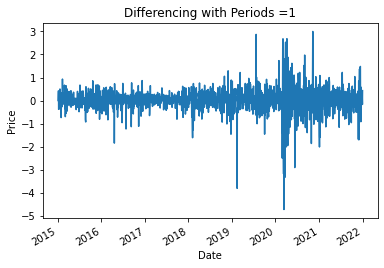

In [18]:
d = return_d(data = X, plotting = True)

/Users/sammy/opt/anaconda3/envs/Capstone/lib/python3.7/site-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


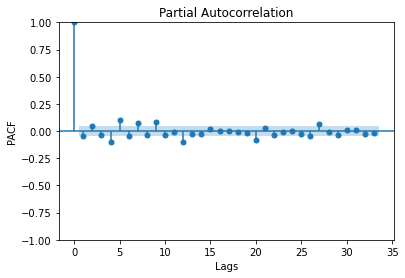

In [19]:
# Uses differenced data to calculate PACF

p = return_p(data = X, plotting = True) 

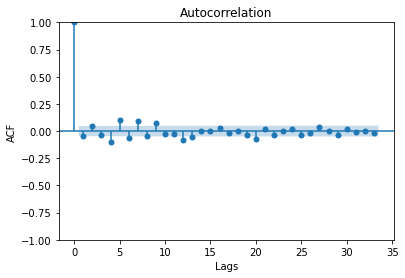

In [20]:
# Uses differenced data to calculate ACF

q = return_q(data = X, plotting = True) 

In [21]:
print("p = ",p)
print("d = ",d)
print("q = ",q)

p =  0
d =  1
q =  0


# Modeling

# ARIMA Model:

/Users/sammy/opt/anaconda3/envs/Capstone/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:595: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/sammy/opt/anaconda3/envs/Capstone/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:595: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.63157D-01    |proj g|=  5.63458D+08



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/Users/sammy/opt/anaconda3/envs/Capstone/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      1     21      1     0     0   5.635D+08   7.632D-01
  F =  0.76315686123117854     

ABNORMAL_TERMINATION_IN_LNSRCH                              


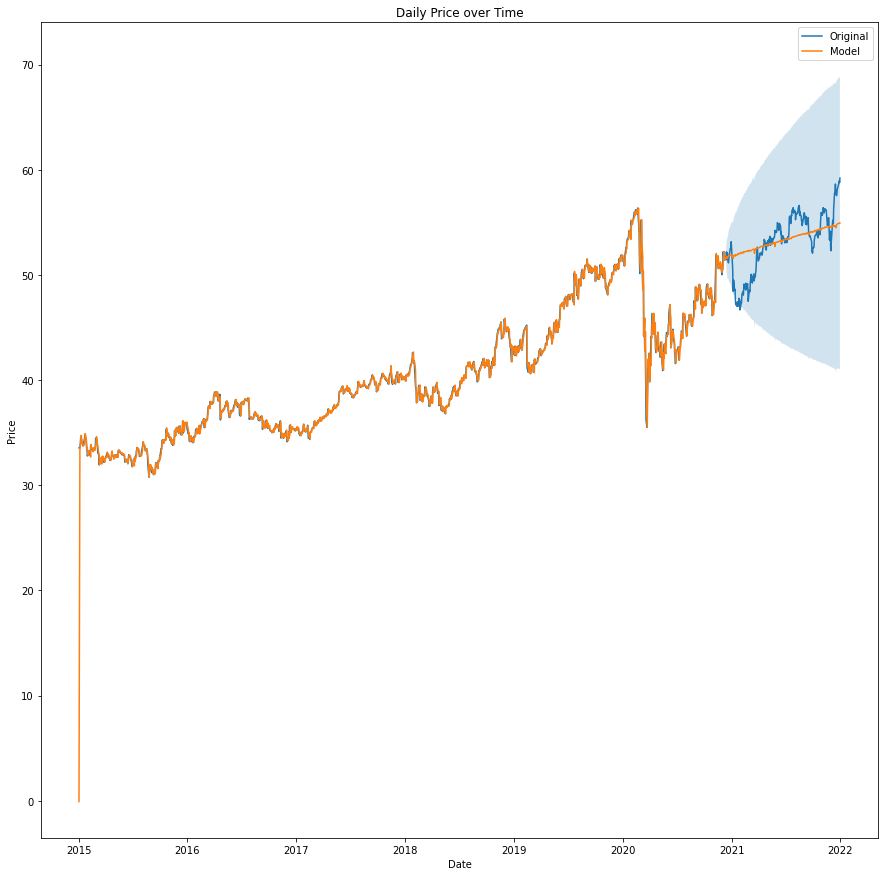

                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                 1498
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -1143.209
Date:                Wed, 02 Feb 2022   AIC                           2292.418
Time:                        10:06:13   BIC                           2308.352
Sample:                             0   HQIC                          2298.354
                               - 1498                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0121      0.015      0.825      0.410      -0.017       0.041
Volume     -8.301e-09   1.25e-09     -6.647      0.000   -1.07e-08   -5.85e-09
sigma2         0.2697      0.004     73.948      0.0

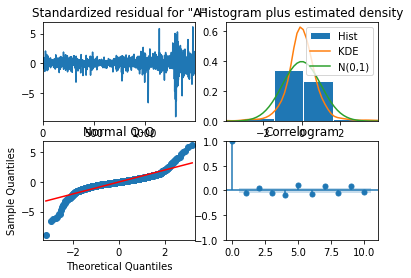

In [22]:
arima = base_model(df, 
                   exog = True,
                   logged = False,
                   plotting = True,
                   summary = True,
                   mse = True)

/Users/sammy/opt/anaconda3/envs/Capstone/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:595: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/sammy/opt/anaconda3/envs/Capstone/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:595: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.99101D+00    |proj g|=  6.78006D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      1     19      1     0     0   6.780D-02  -2.991D+00
  F =  -2.9910123857641806     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


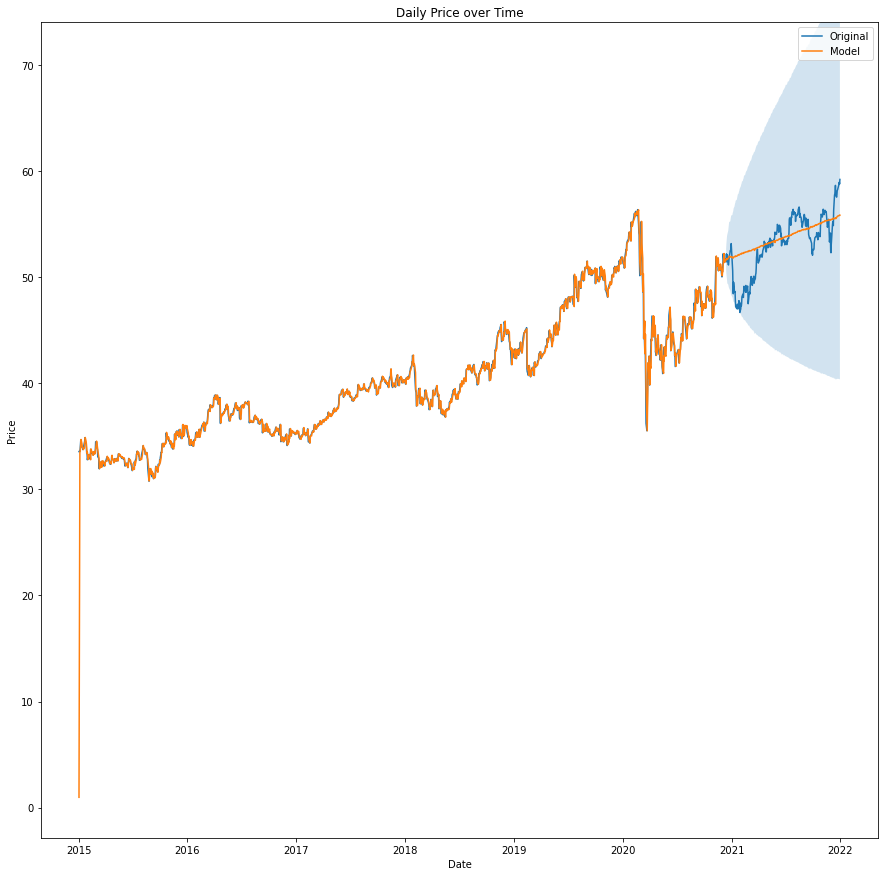

                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                 1498
Model:               SARIMAX(0, 1, 0)   Log Likelihood                4480.537
Date:                Wed, 02 Feb 2022   AIC                          -8955.073
Time:                        10:06:15   BIC                          -8939.139
Sample:                             0   HQIC                         -8949.137
                               - 1498                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0003      0.000      0.820      0.412      -0.000       0.001
Volume        -0.0020      0.001     -2.939      0.003      -0.003      -0.001
sigma2         0.0001   2.12e-06     69.459      0.0

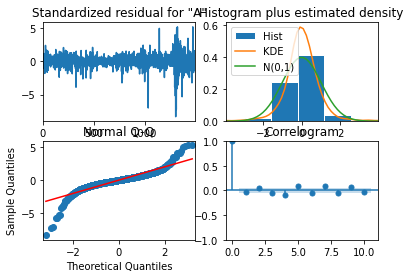

In [23]:
arima_logged = base_model(df,
                          exog = True,
                          logged = True,
                          plotting = True,
                          summary = True,
                          mse = True)

# Base Model Findings

> Base ARIMA model has an AIC of 2292.42 and RMSE of 2.15

> Base ARIMA model with log transformed data has an AIC of -8955.07 and RMSE of 2.08

> In both evaluation metrics, the log transformed model performed better

> Visually, the untransformed and log transformed models appears to be the same. 
>> Although, the slope of the model for the logged transformed data is higher than the untranformed model

> The Volume variable is significant for the both models

# Auto Arima Model: 

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2286.701, Time=1.48 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2302.007, Time=0.19 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2299.775, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2300.160, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2300.817, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2298.341, Time=0.70 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2277.883, Time=0.73 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2288.608, Time=0.97 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2297.886, Time=0.33 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=2296.197, Time=0.79 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=2297.424, Time=0.34 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=2287.988, Time=1.72 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=2276.818, Time=1.00 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=2287.388, Time=1.17 sec
 ARIMA(2,1,0)(0,0,0)[0]          

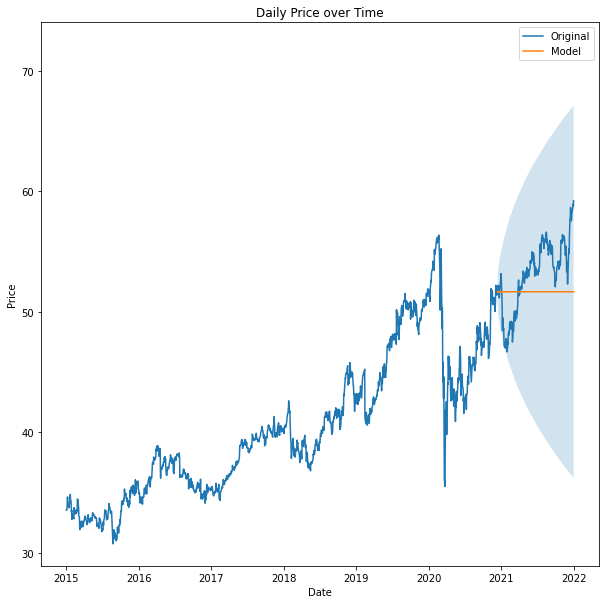

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1498
Model:               SARIMAX(2, 1, 1)   Log Likelihood               -1134.409
Date:                Wed, 02 Feb 2022   AIC                           2276.818
Time:                        10:06:33   BIC                           2298.063
Sample:                             0   HQIC                          2284.734
                               - 1498                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9882      0.018    -55.444      0.000      -1.023      -0.953
ar.L2         -0.0933      0.012     -7.975      0.000      -0.116      -0.070
ma.L1          0.9496      0.015     64.756      0.0

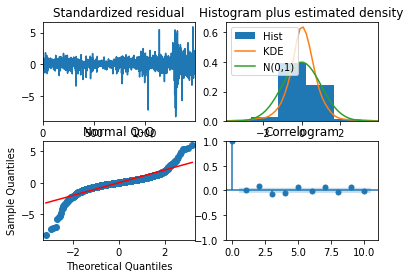

In [24]:
autoarima = create_auto_arima(df,
                              exog = True,
                              logged = False,
                              plotting = True,
                              summary = True,
                              mse = True, 
                              trace = True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-8960.277, Time=3.71 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-8952.342, Time=0.21 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-8952.213, Time=0.33 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-8952.068, Time=0.39 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-8953.495, Time=0.11 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-8950.629, Time=0.31 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-8950.861, Time=1.10 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-8963.031, Time=2.09 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-8952.852, Time=0.56 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-8964.901, Time=1.77 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-8985.335, Time=2.24 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-8969.271, Time=0.78 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=-8977.051, Time=0.58 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-8954.633, Time=0.24 sec
 ARIMA(5,1,0)(0,0,0

/Users/sammy/opt/anaconda3/envs/Capstone/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(4,1,2)(0,0,0)[0]             : AIC=-8991.137, Time=1.50 sec
 ARIMA(5,1,1)(0,0,0)[0]             : AIC=-8978.125, Time=0.44 sec
 ARIMA(5,1,3)(0,0,0)[0]             : AIC=-8984.736, Time=1.64 sec
 ARIMA(4,1,1)(0,0,0)[0]             : AIC=-8967.683, Time=1.09 sec
 ARIMA(4,1,3)(0,0,0)[0]             : AIC=-9001.342, Time=1.68 sec
 ARIMA(3,1,3)(0,0,0)[0]             : AIC=-8976.328, Time=1.31 sec
 ARIMA(4,1,4)(0,0,0)[0]             : AIC=-8961.263, Time=0.86 sec
 ARIMA(3,1,2)(0,0,0)[0]             : AIC=-8954.389, Time=0.56 sec
 ARIMA(3,1,4)(0,0,0)[0]             : AIC=-8988.936, Time=1.60 sec
 ARIMA(5,1,4)(0,0,0)[0]             : AIC=-8989.711, Time=1.93 sec

Best model:  ARIMA(4,1,3)(0,0,0)[0]          
Total fit time: 40.347 seconds


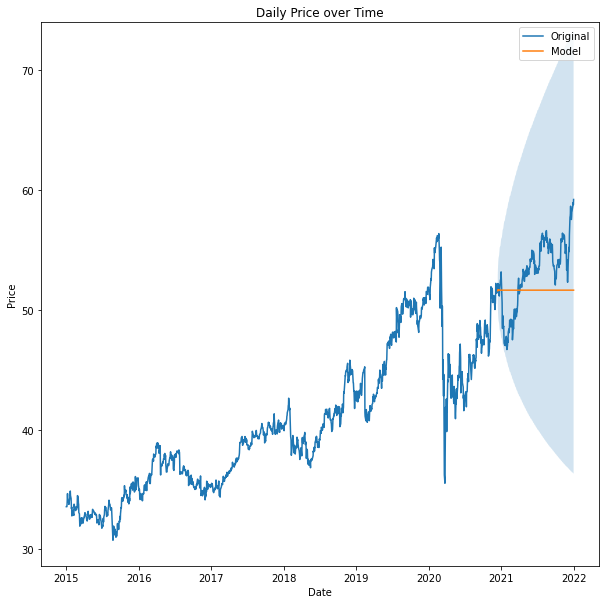

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1498
Model:               SARIMAX(4, 1, 3)   Log Likelihood                4508.671
Date:                Wed, 02 Feb 2022   AIC                          -9001.342
Time:                        10:07:17   BIC                          -8958.852
Sample:                             0   HQIC                         -8985.511
                               - 1498                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8609      0.094     -9.124      0.000      -1.046      -0.676
ar.L2         -0.0937      0.140     -0.668      0.504      -0.368       0.181
ar.L3         -0.1415      0.084     -1.677      0.0

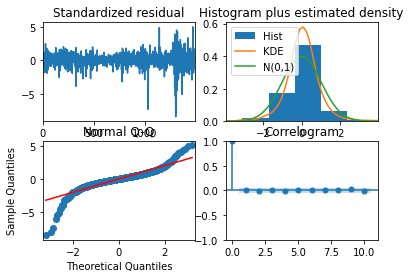

In [25]:
autoarima_logged = create_auto_arima(df,
                                     exog = True,
                                     logged = True,
                                     plotting = True,
                                     summary = True,
                                     mse = True, 
                                     trace = True)

## Auto ARIMA Findings:

> The auto ARIMA model with untransformed data performed roughly the same as the base ARIMA model. 
>> AIC = 2276.82 and RMSE = 3.20 

> The auto ARIMA model with log transformed data also performed roughly the same as results to base ARIMA with transformed data. 
>> AIC = -9001.34 and RMSE = 3.21

> Visually, the untransformed and log transformed models appears to be the same.

# Facebook Prophet Model

Initial log joint probability = -4.84766
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4228.22      0.026978       1985.86           1           1      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       4311.32    0.00806807       239.183           1           1      239   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       4330.89     0.0154635       2106.22      0.8161      0.8161      350   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       4351.29    0.00267704       220.739           1           1      464   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       4357.95   9.33728e-05       180.128      0.2658      0.2658      585   
    Iter      log prob        ||dx||      ||grad||       alpha  

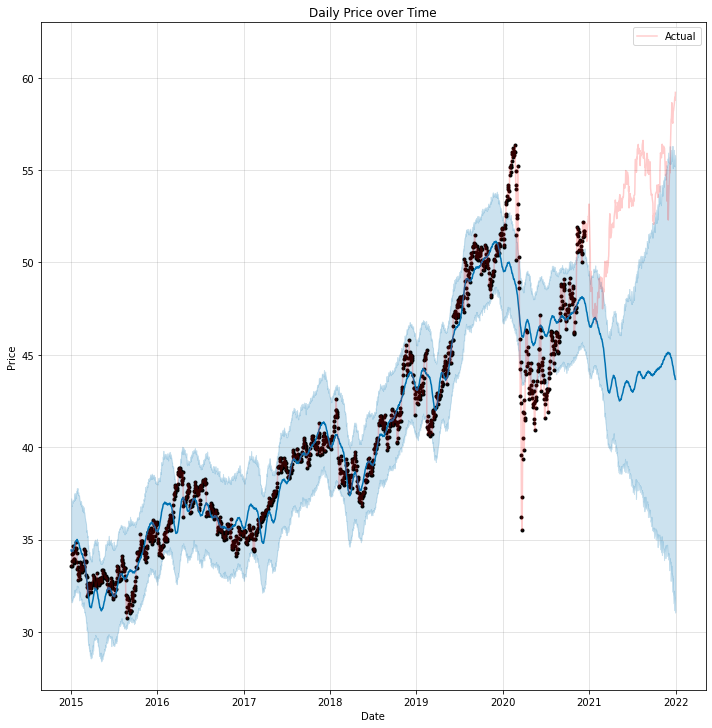

Prophet Test RMSE: 9.451715222385229


In [26]:
fb = create_prophet(data = df,
                    logged = False,
                    plotting = True,
                    mse = True)

Initial log joint probability = -2.25304
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6009.08     0.0181035       6944.25           1           1      135   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6107.98     0.0100166       2650.13      0.4382           1      248   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       6215.23    0.00100557       2834.94           1           1      358   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399        6251.2    0.00180016       2336.21           1           1      470   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       6291.79    0.00703896       3279.06           1           1      588   
    Iter      log prob        ||dx||      ||grad||       alpha  

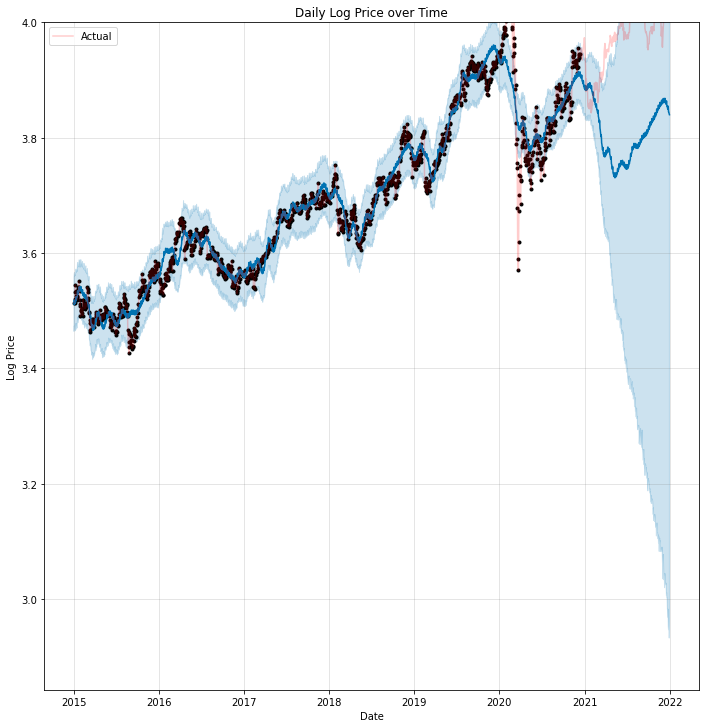

Logged Prophet Test RMSE: 8.93505598115982


In [27]:
fb_logged = create_prophet(data = df,
                           logged = True,
                           plotting = True,
                           mse = True)

## Facebook Prophet Findings: 

> Base Model with untransformed data had an RMSE of 9.45 

> The Model with log transformed data had a slightly improved RMSE of 8.94

> In the visualizations, the model with untransformed data provided a safe forecasting based on the trend

> However, both the untransformed and transformed model undervalued the future prices

# Highest Growths in 90 Days

> Utilizing the best version of each model above, the models will be refit using the entire data set and forecasting the growth after 90 days

/Users/sammy/opt/anaconda3/envs/Capstone/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:595: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/sammy/opt/anaconda3/envs/Capstone/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:595: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.01913D+00    |proj g|=  7.16872D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      1     11      1     0     0   6.960D-02  -3.019D+00
  F =  -3.0191309969818461     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


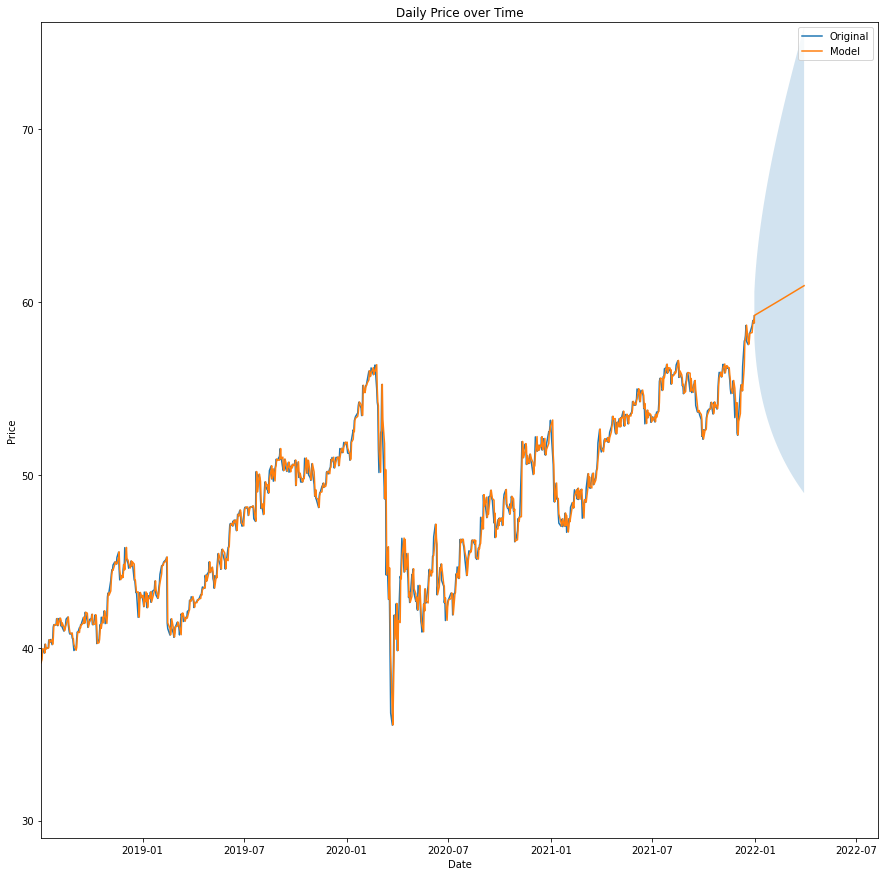

                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                 1763
Model:               SARIMAX(0, 1, 0)   Log Likelihood                5322.728
Date:                Wed, 02 Feb 2022   AIC                         -10641.456
Time:                        10:07:36   BIC                         -10630.507
Sample:                             0   HQIC                        -10637.410
                               - 1763                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0003      0.000      1.105      0.269      -0.000       0.001
sigma2         0.0001   1.85e-06     75.315      0.000       0.000       0.000
Ljung-Box (L1) (Q):                   2.14   Jarque-

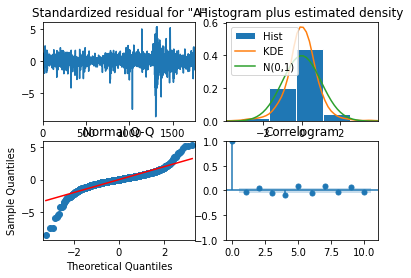

In [28]:
arima_90, arima_roi = base_model(df,
                                 exog = True,
                                 logged = True,
                                 plotting = True,
                                 summary = True,
                                 full = True,
                                 roi = True, 
                                 return_roi = True)

# Auto ARIMA Growth

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-10637.469, Time=1.77 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-10641.456, Time=0.22 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-10641.594, Time=0.22 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-10641.438, Time=0.35 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-10642.142, Time=0.17 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-10639.511, Time=0.72 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 3.453 seconds


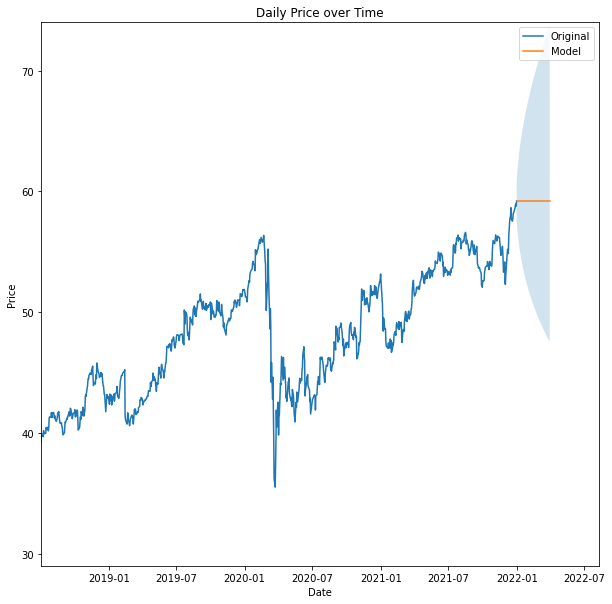

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1763
Model:               SARIMAX(0, 1, 0)   Log Likelihood                5322.071
Date:                Wed, 02 Feb 2022   AIC                         -10642.142
Time:                        10:07:40   BIC                         -10636.668
Sample:                             0   HQIC                        -10640.119
                               - 1763                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0001   1.79e-06     77.791      0.000       0.000       0.000
Ljung-Box (L1) (Q):                   2.14   Jarque-Bera (JB):             10589.50
Prob(Q):                              0.14   Pr

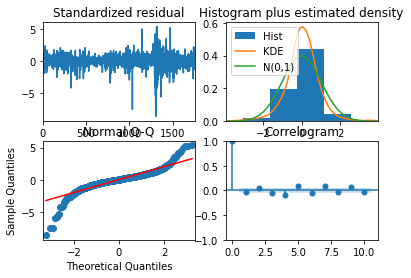

In [29]:
autoarima_90, autoarima_roi = create_auto_arima(df,
                                                exog = True,
                                                logged = True,
                                                plotting = True, 
                                                trace = True,
                                                summary = True,
                                                full = True,
                                                roi = True,
                                                return_roi = True)

# Facebook Prophet Growth

Initial log joint probability = -8.14715
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5052.39    0.00272151       489.515           1           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5209.75   0.000870833       352.168           1           1      239   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299          5237     0.0144598       1330.59           1           1      349   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5290.48    0.00442333       385.582           1           1      456   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       5310.63    0.00504994       1279.61           1           1      578   
    Iter      log prob        ||dx||      ||grad||       alpha  

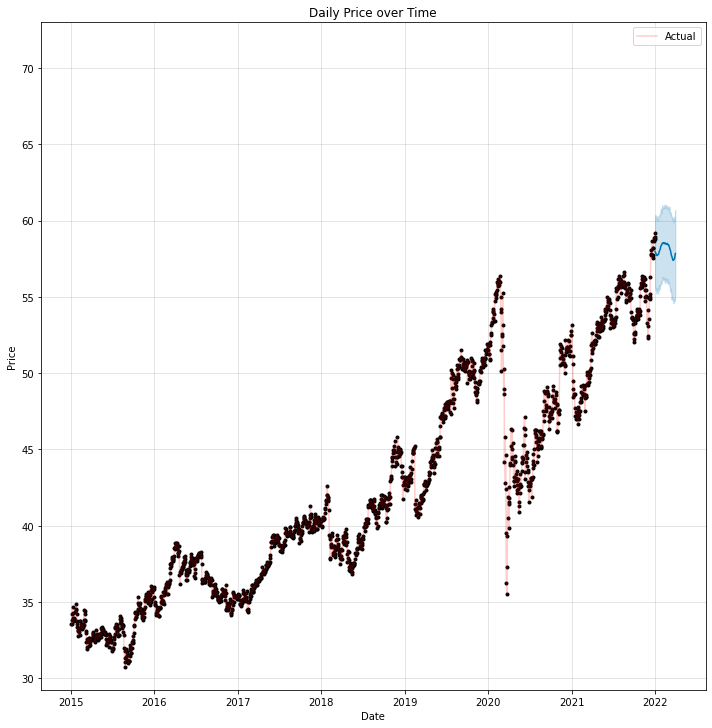

Prophet ROI:  -2.29 %


In [30]:
fb_90, fb_roi = create_prophet(df,
                               exog = False,
                               logged = False,
                               plotting = True,
                               full = True,
                               roi = True,
                               return_roi = True)

# Conclusions:

> The ARIMA models expect a growth of 3.66 % after 90 days

> The Auto ARIMA model expects a growth of 0.0 %. It shows a neutral growth rate over time.

> The Facebook Prophet model expects a growth of -2.29 % after 90 days. It maintains a cyclical growth rate over time.